<a href="https://colab.research.google.com/github/ifte110/tensorflow-deep-learning-0toM-Self-Practice/blob/main/02_nn_class_tensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise =0.03, random_state=42)

In [ ]:
X.shape

(1000, 2)

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1],"label":y})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


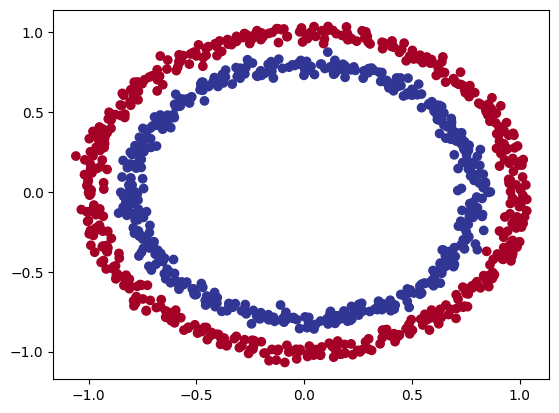

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1.fit(X,y,epochs=100, verbose=0)

In [ ]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.5100


[0.6973136067390442, 0.5099999904632568]

In [ ]:
m = model_1.predict(X)
m.shape
m[:5]

32/32 [==============================] - 0s 2ms/step


array([[0.47931835],
       [0.58041066],
       [0.5861116 ],
       [0.5953205 ],
       [0.4165794 ]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_bound(model, X , y):
  X_min, X_max = X[:, 0].min() -0.1,X[:,0].max() + 0.1
  y_min, y_max = X[:, 1].min() -0.1,X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                       np.linspace(y_min, y_max, 100))
  x_in = np.c_[xx.ravel(),yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.arg_max(y_pred, axis =1)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.ylim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


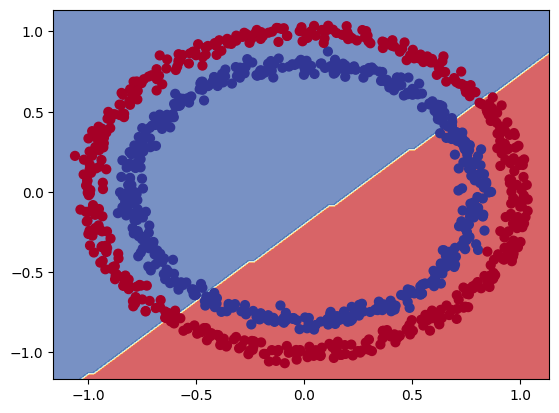

In [ ]:
plot_decision_bound(model_1, X, y)

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.0117 - accuracy: 0.4760
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 4.9122 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.7822 - accuracy: 0.4750
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5779 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5311 - accuracy: 0.4720
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5249 - accuracy: 0.4700
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5201 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5159 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.5120 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.5107 - accuracy: 0.4690
Epoch 11/

In [ ]:
from keras.losses import binary_crossentropy
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 4ms/step - loss: 0.6868 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6851 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5020
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6812 - accuracy: 0.5280
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.5230
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6784 - accuracy: 0.5620
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6772 - accuracy: 0.5950
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6757 - accuracy: 0.6120
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6742 - accuracy: 0.5900
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


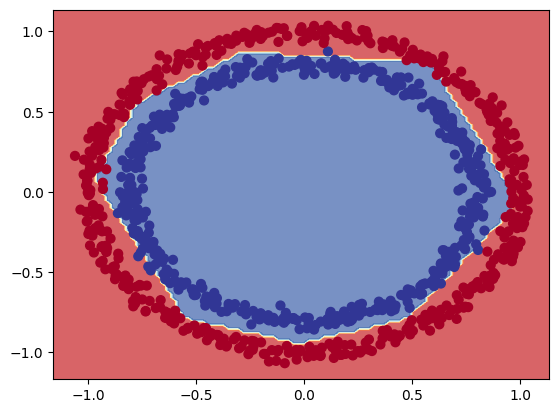

In [ ]:
plot_decision_bound(model_3,X,y)

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
import tensorflow as tf
from keras.losses import binary_crossentropy
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history=model_4.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 6s 3ms/step - loss: 0.6889 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6874 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6856 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.4988 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

In [ ]:
model_4.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2175 - accuracy: 0.9750


[0.21745117008686066, 0.9750000238418579]

<Axes: >

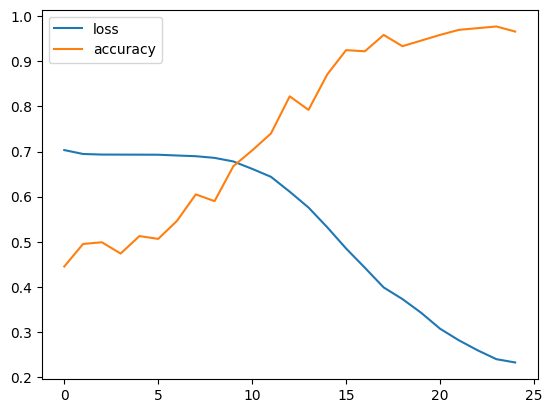

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot()

<Axes: xlabel='epochs'>

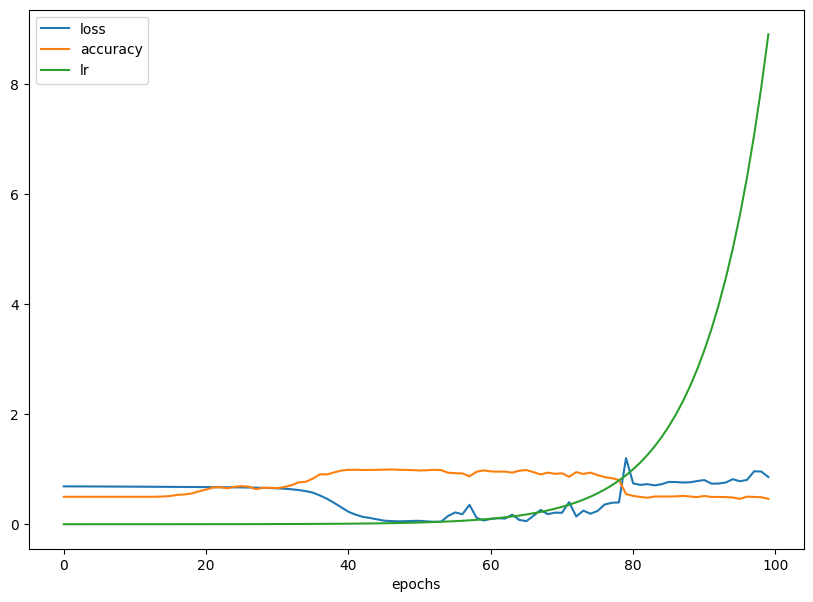

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10,7),xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

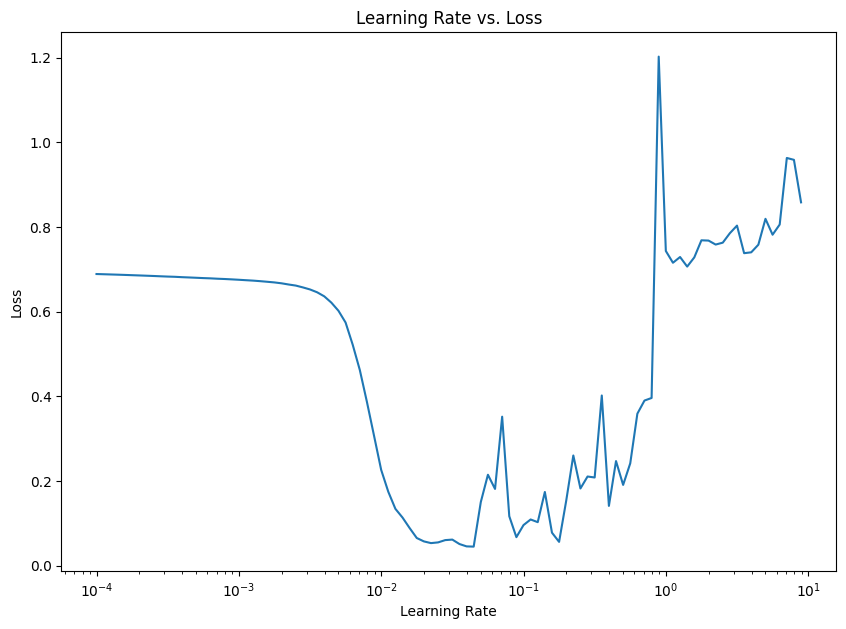

In [ ]:
import matplotlib.pyplot as plt

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [ ]:
import numpy as np

min_loss_index = np.argmin(history.history["loss"])

# Get the corresponding learning rate at the minimum loss index
min_loss_lr = lrs[min_loss_index]
min_loss_value = history.history["loss"][min_loss_index]

min_loss_index, min_loss_lr, min_loss_value

(53,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.04466835921509631>,
 0.04502895846962929)

In [ ]:
import tensorflow as tf
from keras.losses import binary_crossentropy
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.04),
                metrics=["accuracy"])


history_5 = model_5.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 7s 5ms/step - loss: 0.6917 - accuracy: 0.5425
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6781 - accuracy: 0.5800
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6353 - accuracy: 0.6925
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5630 - accuracy: 0.7387
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5060 - accuracy: 0.7487
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3815 - accuracy: 0.8775
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2396 - accuracy: 0.9600
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1580 - accuracy: 0.9775
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9787
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9912
Epoch 11/20
25/25 [

In [ ]:
model_5.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0698 - accuracy: 0.9700


[0.06975377351045609, 0.9700000286102295]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


<function matplotlib.pyplot.show(close=None, block=None)>

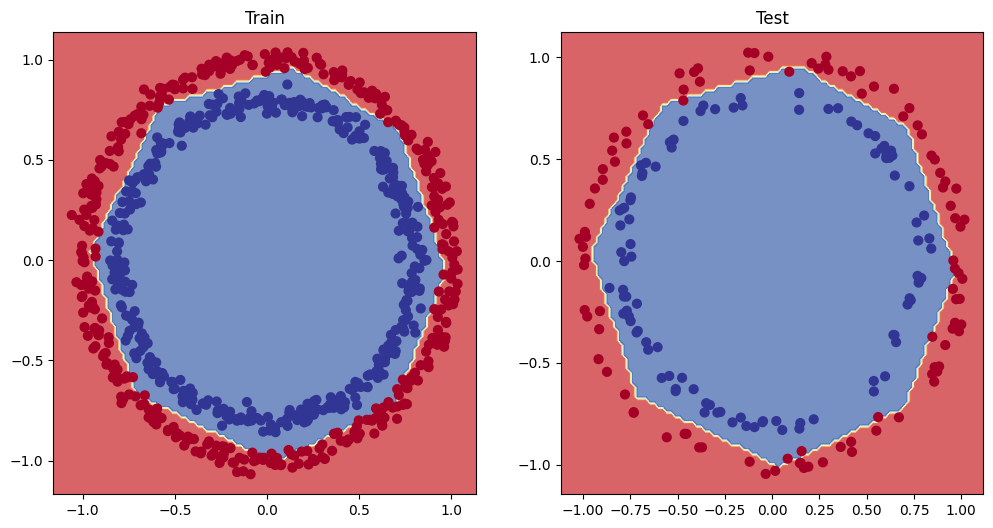

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_bound(model_5,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_bound(model_5,X_test,y_test)
plt.show

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model_5.predict(X_test)

confusion_matrix(y_test, tf.round(y_pred))

7/7 [==============================] - 0s 2ms/step


array([[95,  6],
       [ 0, 99]])

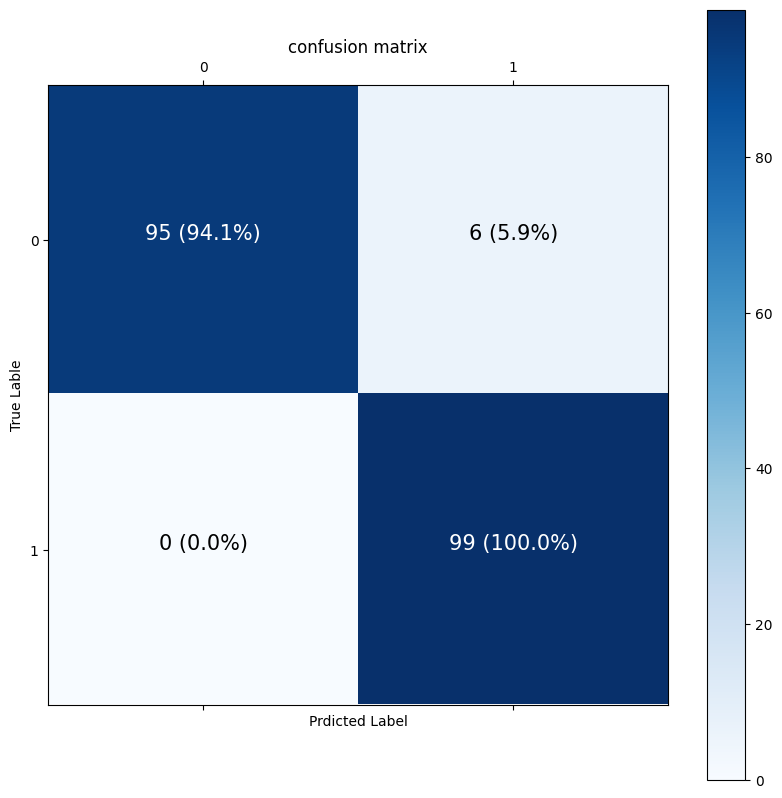

In [ ]:
import itertools

figsize =(10,10)

cm= confusion_matrix(y_test,tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1) [:,np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)

fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",xlabel="Prdicted Label",
       ylabel="True Lable", xticks = np.arange(n_classes),
       yticks=np.arange(n_classes), xticklabels=labels,
       yticklabels=labels)

threshold = (cm.max()+cm.min())/2.0

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
           horizontalalignment="center",
           color= "white" if cm[i,j] > threshold else "black",
           size=15)

In [1]:
import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels),(test_data, test_labels)=\
fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
train_data[0].shape

(28, 28)

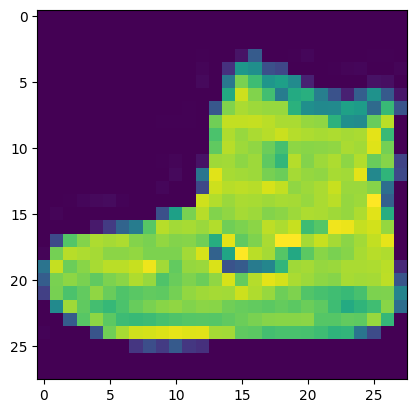

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0])

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

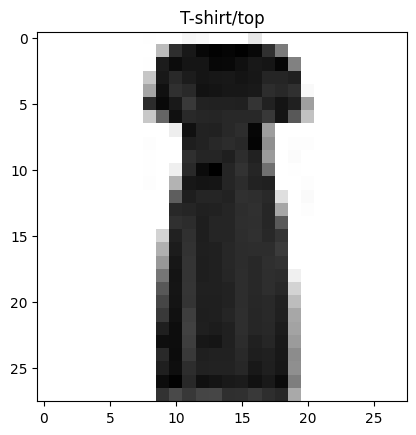

In [ ]:
plt.imshow(train_data[50], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]]);

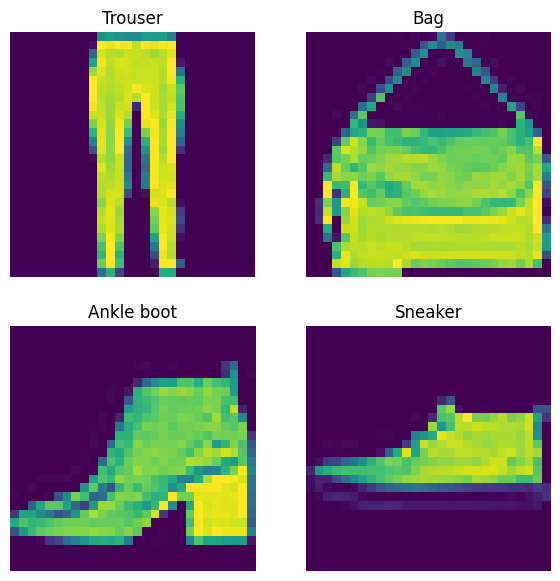

In [ ]:
import random

plt.figure(figsize=(7,7))

for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [2]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [3]:
import tensorflow as tf
from keras.losses import binary_crossentropy
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


history_6 = model_6.fit(train_data_norm,train_labels,epochs=10,
                        validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 3ms/step - loss: 1.3445 - accuracy: 0.5542 - val_loss: 0.8599 - val_accuracy: 0.7376
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7116 - accuracy: 0.7677 - val_loss: 0.6687 - val_accuracy: 0.7719
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6106 - accuracy: 0.7837 - val_loss: 0.6302 - val_accuracy: 0.7840
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5809 - accuracy: 0.7890 - val_loss: 0.6039 - val_accuracy: 0.7878
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5614 - accuracy: 0.8001 - val_loss: 0.5864 - val_accuracy: 0.7996
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5382 - accuracy: 0.8138 - val_loss: 0.5780 - val_accuracy: 0.8047
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5285 - accuracy: 0.8172 - val_loss: 0.5782 - val_accuracy

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true,y_pred, classes=None,figsize=(10,10),
                          text_size=15):

  cm= confusion_matrix(y_true,tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1) [:,np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",xlabel="Prdicted Label",
        ylabel="True Lable", xticks = np.arange(n_classes),
        yticks=np.arange(n_classes), xticklabels=labels,
        yticklabels=labels)

  threshold = (cm.max()+cm.min())/2.0

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color= "white" if cm[i,j] > threshold else "black",
            size=text_size)

In [8]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
y_probs = model_6.predict(test_data_norm)

313/313 [==============================] - 1s 2ms/step


array([8.6436712e-06, 4.7057598e-05, 1.4636548e-09, 9.8259374e-09,
       3.3811143e-13, 3.1094733e-01, 6.4535402e-07, 8.1254035e-02,
       2.2613134e-03, 6.0548097e-01], dtype=float32)

In [ ]:
y_preds = y_probs.argmax(axis=1)

y_preds.shape

(10000,)

In [ ]:
res_list =[]

for i in y_preds:
  res_list.append(class_names[i])

res_list[:5]

['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[845,   6,   5,  60,   3,   2,  73,   0,   6,   0],
       [ 21, 933,   5,  28,   3,   0,  10,   0,   0,   0],
       [ 23,   1, 691,   9, 144,   0, 130,   0,   2,   0],
       [ 86,  39,   2, 773,  19,   0,  79,   0,   1,   1],
       [  1,   0, 104,  62, 672,   0, 157,   0,   4,   0],
       [  2,   0,   0,   0,   0, 902,   0,  60,   6,  30],
       [217,   1, 112,  49, 126,   1, 485,   0,   8,   1],
       [  0,   0,   0,   0,   0,  32,   0, 937,   0,  31],
       [ 11,   1,   6,   4,   6,   9,  63,   6, 894,   0],
       [  1,   1,   0,   0,   0,  23,   0,  57,   1, 917]])

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

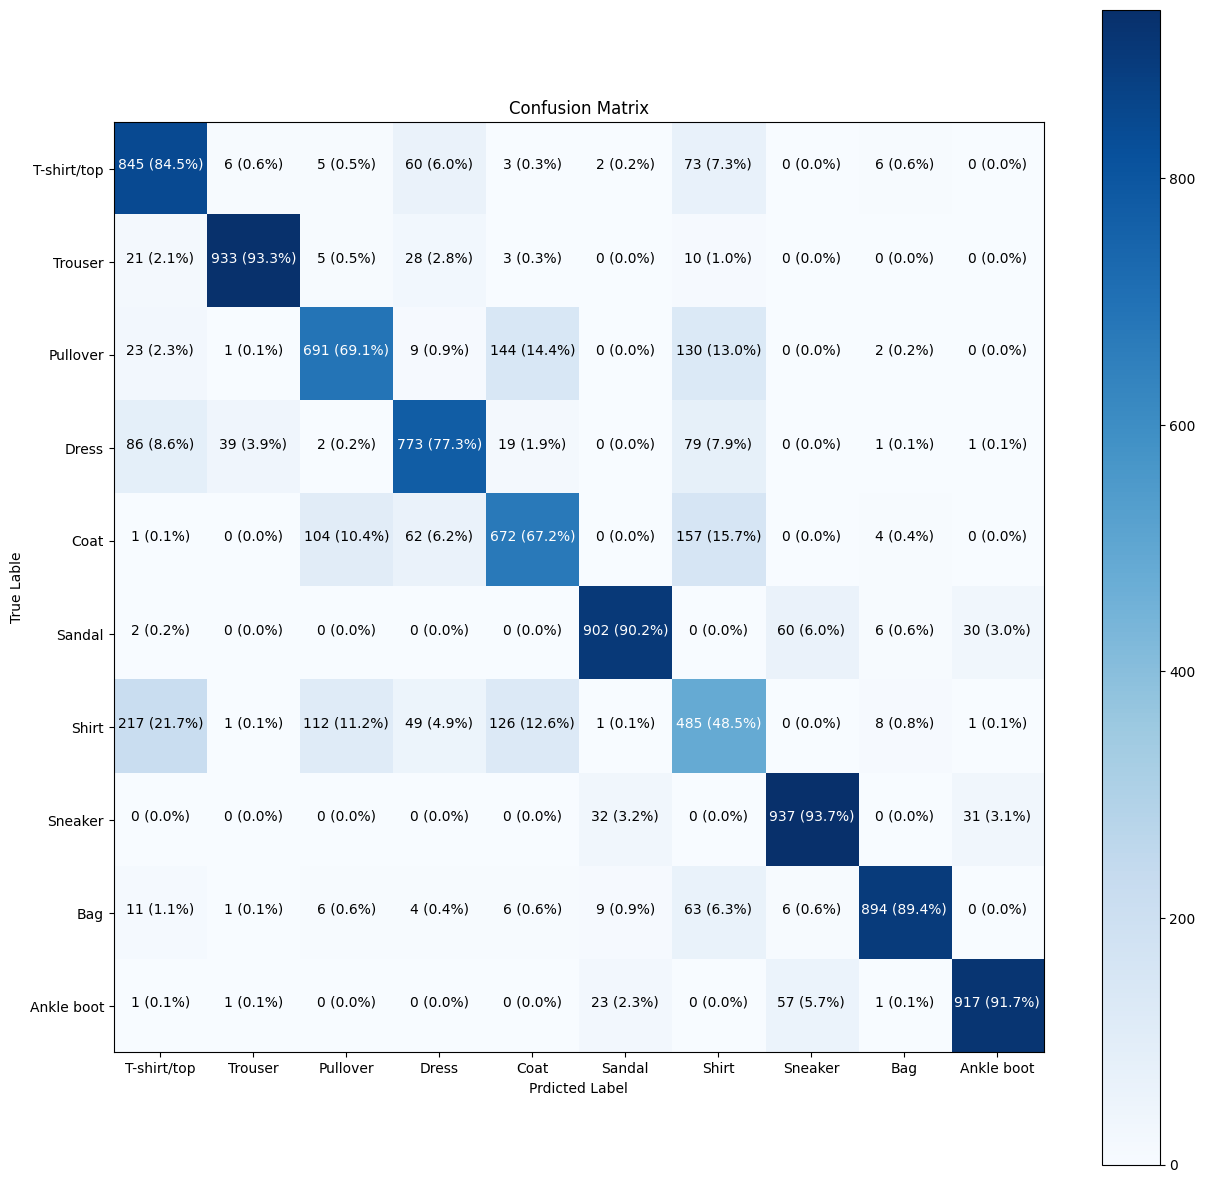

In [ ]:
make_confusion_matrix(y_true=test_labels,y_pred=y_preds,
                      classes=class_names,figsize=(15,15), text_size=10)

In [29]:
import random
import matplotlib.pyplot as plt

def plot_random_image(model,images,true_labels,classes):
  i = random.randint(0,len(images))

  target_image= images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label= classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)

  if pred_label == true_label:
    color= "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.\
                                                   reduce_max(pred_probs),
                                                   true_label),
                                                   color=color)

1/1 [==============================] - 0s 17ms/step


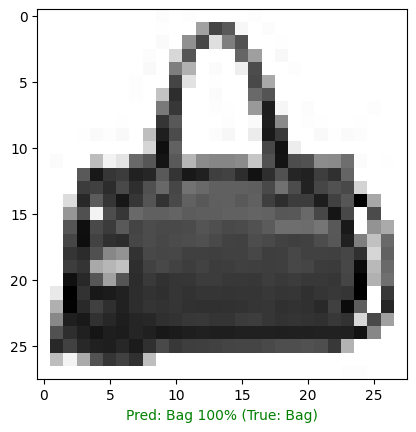

In [33]:
plot_random_image(model_6,test_data,test_labels,class_names)

In [58]:
weights , biases =model_6.layers[1].get_weights()

weights,weights.shape

(array([[ 0.08844697, -0.12867276, -0.22570647,  0.16031758],
        [-0.07159947, -0.374882  ,  0.06652166,  0.18696177],
        [-0.34277236, -0.09978829, -0.4357997 , -0.06121386],
        ...,
        [-0.43621054, -0.13556416,  0.10905627,  0.22521164],
        [ 0.03510743, -0.16249639,  0.05017629,  0.52243733],
        [-0.17248614,  0.11979551, -0.32339385,  0.3980767 ]],
       dtype=float32),
 (784, 4))

In [59]:
biases, biases.shape

(array([0.05459413, 0.44256037, 1.0397294 , 1.0468931 ], dtype=float32), (4,))